Sprawozdanie z zajęć nr 13
Mateusz Stelmaszek
80275

Aby zaimplementować program w Google Colab z wykorzystaniem PyTorch, należy najpierw zainstalować bibliotekę i skonfigurować środowisko.

In [1]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Następnie należy zaimportować potrzebne biblioteki (import) i zdefiniować parametry dla algorytmu Monte Carlo, takie jak liczba losowanych punktów i promień okręgu (num_samples oraz radius)


Aby obliczyć pole okręgu na CPU, można użyć funkcji torch.rand() do wygenerowania losowych punktów w kwadracie o boku równym dwa razy promień okręgu, a następnie policzyć ile z nich znajduje się wewnątrz okręgu.



#Opis programu:
#1.Importowanie bibliotek PyTorch i Matplotlib.
#2.Ustawienie liczby próbek (num_samples) i promienia okręgu (radius).
#3.Tworzenie obiektów start i end, które będą używane do pomiaru czasu wykonywania kodu na GPU.
#4.Rozpoczynanie pomiaru czasu za pomocą metody record() obiektu start.
#5.Tworzenie tensora o wymiarach (num_samples, 2) z losowymi liczbami z zakresu (-radius, radius).
#6.Obliczanie ilości punktów leżących wewnątrz koła za pomocą metody pow() i sum(), a następnie zamienianie tensora na liczbę za pomocą metody item().
#7.Koniec pomiaru czasu za pomocą metody record() obiektu end.
#8.Obliczanie czasu wykonywania kodu na GPU za pomocą metody elapsed_time() obiektu start.
#9.Obliczanie pola okręgu za pomocą wzoru area = inside_circle / num_samples * 4 * radius ** 2.
#10.Wypisanie pola okręgu i czasu wykonania na ekranie.

In [4]:
import torch
import matplotlib.pyplot as plt
num_samples = 1000000
radius = 1

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()

samples = torch.rand(num_samples, 2) * 2 * radius - radius
inside_circle = (samples.pow(2).sum(dim=1) < radius ** 2).sum().item()

end.record()

cpu_time = start.elapsed_time(end)

area = inside_circle / num_samples * 4 * radius ** 2
print('Wielkość koła):', area)
print('czas wykonywania ):',cpu_time)

Area of circle (CPU): 3.137312
Time (CPU): 39.718910217285156


#Ten kod różni się od poprzedniego tym, że zmienne "samples" i "inside_circle" są przetwarzane na GPU za pomocą parametru "device='cuda'" przy tworzeniu tensorów.

In [5]:
import torch
import matplotlib.pyplot as plt

num_samples = 1000000
radius = 1
start.record()

samples = torch.rand(num_samples, 2, device='cuda') * 2 * radius - radius
inside_circle = (samples.pow(2).sum(dim=1) < radius ** 2).sum().item()

end.record()

gpu_time = start.elapsed_time(end)

area = inside_circle / num_samples * 4 * radius ** 2
print('Wielkość koła):', area)
print('czas wykonywania ):',gpu_time)

Area of circle (GPU): 3.138728
Time (GPU): 3561.7001953125


Aby przedstawić różnice w czasie obliczeń dla CPU i GPU w zależności od rozmiaru problemu, tworzymy wykres z użyciem matplotlib.

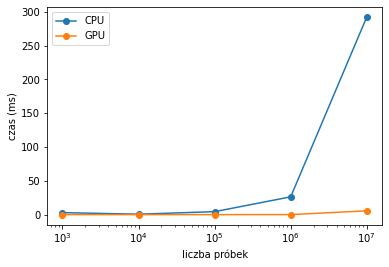

In [7]:
sizes = [10**i for i in range(3,8)]
cpu_times = []
gpu_times = []

for size in sizes:
    num_samples = size
    start.record()
    samples = torch.rand(num_samples, 2) * 2 * radius - radius
    inside_circle = (samples.pow(2).sum(dim=1) < radius ** 2).sum().item()
    end.record()
    cpu_times.append(start.elapsed_time(end))

    start.record()
    samples = torch.rand(num_samples, 2, device='cuda') * 2 * radius - radius
    inside_circle = (samples.pow(2).sum(dim=1) < radius ** 2).sum().item()
    end.record()
    gpu_times.append(start.elapsed_time(end))

plt.plot(sizes, cpu_times, '-o', label='CPU')
plt.plot(sizes, gpu_times, '-o', label='GPU')
plt.xscale('log')
plt.xlabel('liczba próbek')
plt.ylabel('czas (ms)')
plt.legend()
plt.show()